In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr
get_ipython().magic('matplotlib inline')

In [12]:
cf=rfr(n_estimators = 5, n_jobs=-1,verbose=1)


In [3]:
zspectra = pd.read_csv('fitted_cest.csv', header = None).values.squeeze()
diff = pd.read_csv('diff.csv', header = None).values.squeeze()
conc = pd.read_csv('conc.csv', header = None).values.squeeze()
pH = pd.read_csv('pH.csv', header = None).values.squeeze()
concs = pd.read_csv('concs.csv', header = None).values.squeeze()
pHs = pd.read_csv('pHs.csv', header = None).values.squeeze()

In [4]:
def mymetric(yexp, ypred):
    d = np.sum((yexp - ypred)**2 )
    d = d / ypred.shape[0]
    d = np.sqrt(d)
    d = d / np.mean(yexp)
    d = 100 * d
    return d

In [5]:
def mystddev(yexp,ypred):
    sy=np.std(ypred)
    d = np.sum(yexp - ypred) / np.sqrt(np.sum((yexp - ypred)**2 ))
    d = d / np.sqrt(ypred.shape[0])
    d = d / np.mean(yexp)
    d = 100 * d
    sd=np.sqrt(np.square(d)*np.square(sy))
    return sd

In [6]:
Y = pH
Ys = np.sort(pHs)

In [13]:
X = diff
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
cf.fit(X_train,y_train)
y_hat=cf.predict(X_test)
mymetric(y_test,y_hat)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


1.8976562872470686

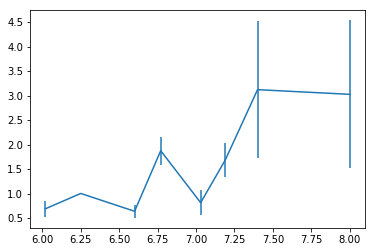

In [14]:
Error_dum = np.zeros(Ys.shape)
Error_std = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[0])):
    Error_dum[K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))])
    Error_std[K] = mystddev(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[K]))])
    
plt.errorbar(Ys,Error_dum, yerr = Error_std);

(-8, 15)

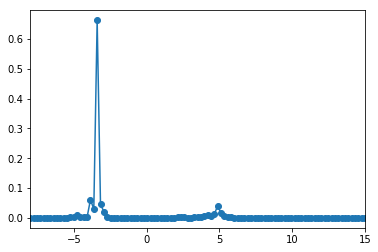

In [9]:
imp=cf.feature_importances_
offset=np.linspace(-8,15,101)
plt.plot(offset,cf.feature_importances_,'-o');
plt.xlim((-8,15))

In [10]:
cf.fit(X_train[:, imp>0.01],y_train)
y_hat=cf.predict(X_test[:, imp>0.01])
mymetric(y_test,y_hat)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


2.0552208837933779

In [11]:
plt.errorbar?